In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from bokeh.plotting import figure, show
import bokeh.plotting as bk_plot
from bokeh.io import output_notebook
output_notebook()

# **Importing Csv File :**

In [128]:
cd = pd.read_csv('Employee.csv')
cd.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


# **Subset for relevant columns**

In [129]:
cd1 = cd[['Education', 'JoiningYear', 'PaymentTier', 'Age','ExperienceInCurrentDomain','LeaveOrNot']]


In [130]:
cd1.head()

,Education,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,3,34,0,0
1,Bachelors,2013,1,28,3,1
2,Bachelors,2014,3,38,2,0
3,Masters,2016,3,27,5,1
4,Masters,2017,3,24,2,1


In [131]:
cd1.shape

(4653, 6)

In [132]:
cd1.dtypes

,0
Education,object
JoiningYear,int64
PaymentTier,int64
Age,int64
ExperienceInCurrentDomain,int64
LeaveOrNot,int64


# Creating a salaryONexperience variable based on the PaymentTier and ExperienceInCurrentDomain variables

In [133]:
cd1['salaryONexperience'] = cd1['ExperienceInCurrentDomain'] - cd1['PaymentTier']


/tmp/ipython-input-2919872309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [134]:
cd1.head()

,Education,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,salaryONexperience
0,Bachelors,2017,3,34,0,0,-3
1,Bachelors,2013,1,28,3,1,2
2,Bachelors,2014,3,38,2,0,-1
3,Masters,2016,3,27,5,1,2
4,Masters,2017,3,24,2,1,-1


# **Sorting employees based on salaryONexperience**


In [135]:
cd_sorted = cd1.sort_values('salaryONexperience', ascending = False)


In [136]:
cd_sorted.head()

,Education,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,salaryONexperience
3982,Bachelors,2012,1,35,7,0,6
3987,Bachelors,2013,1,38,6,0,5
3989,Bachelors,2015,2,41,7,0,5
4339,Bachelors,2014,1,28,5,0,4
3973,Masters,2016,1,31,5,1,4


# **Bar Graph :**
This bar chart showing the salary package of on the basis of year.

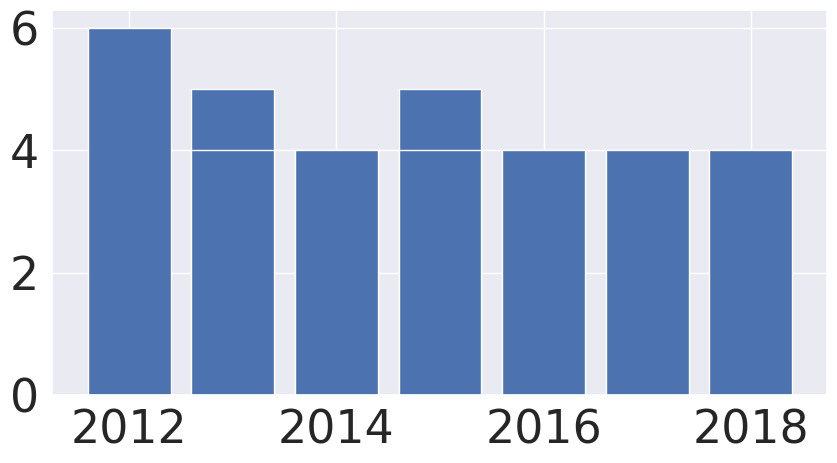

In [137]:
plt.figure(figsize= (10,5))

x = cd_sorted['JoiningYear'][0:10]
y = cd_sorted['salaryONexperience'][0:10]
plt.bar(x,y)
plt.show()

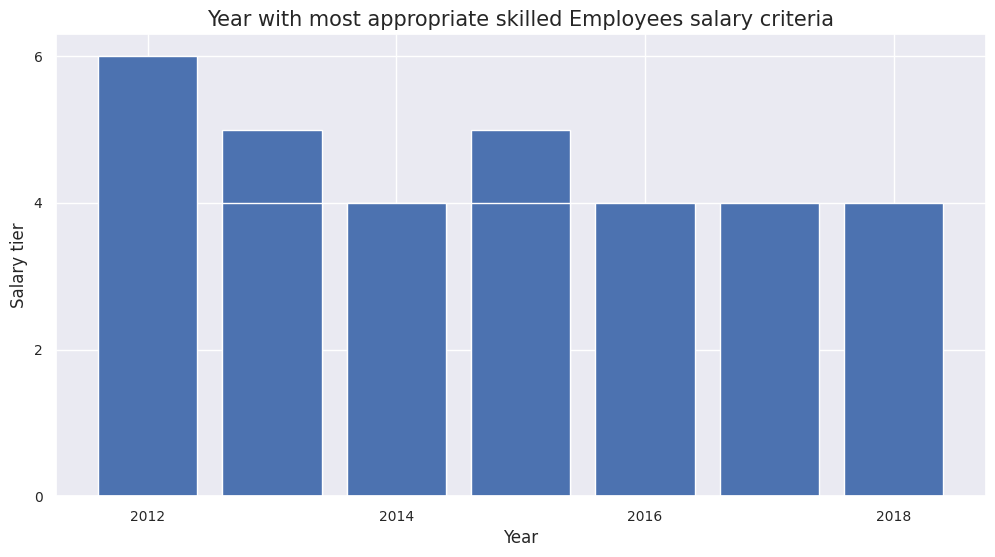

In [138]:
plt.figure(figsize= (12,6))
plt.bar(x,y)
plt.title('Year with most appropriate skilled Employees salary criteria', fontsize=15)
plt.xlabel('Year', fontsize = 12)
plt.xticks(fontsize=10)
plt.ylabel('Salary tier', fontsize=12)
plt.yticks(fontsize=10)
plt.show()

# **Sub Plots :**
A subplot in Matplotlib is a way to place multiple plots (charts) in a single figure. Instead of creating separate figures subplots let us organize plots in rows and columns within the same window.

# **Code** Logic :-
In this graph we see two bar charts side by side

The left chart shows how many matches each of the first 10 teams won.

The right chart shows how much experience the employees have on a scale.

The x-axis lists the experience tier rotated for readability and the y-axis shows the payment salary tier . This lets us compare salary vs experience for each employee visually.

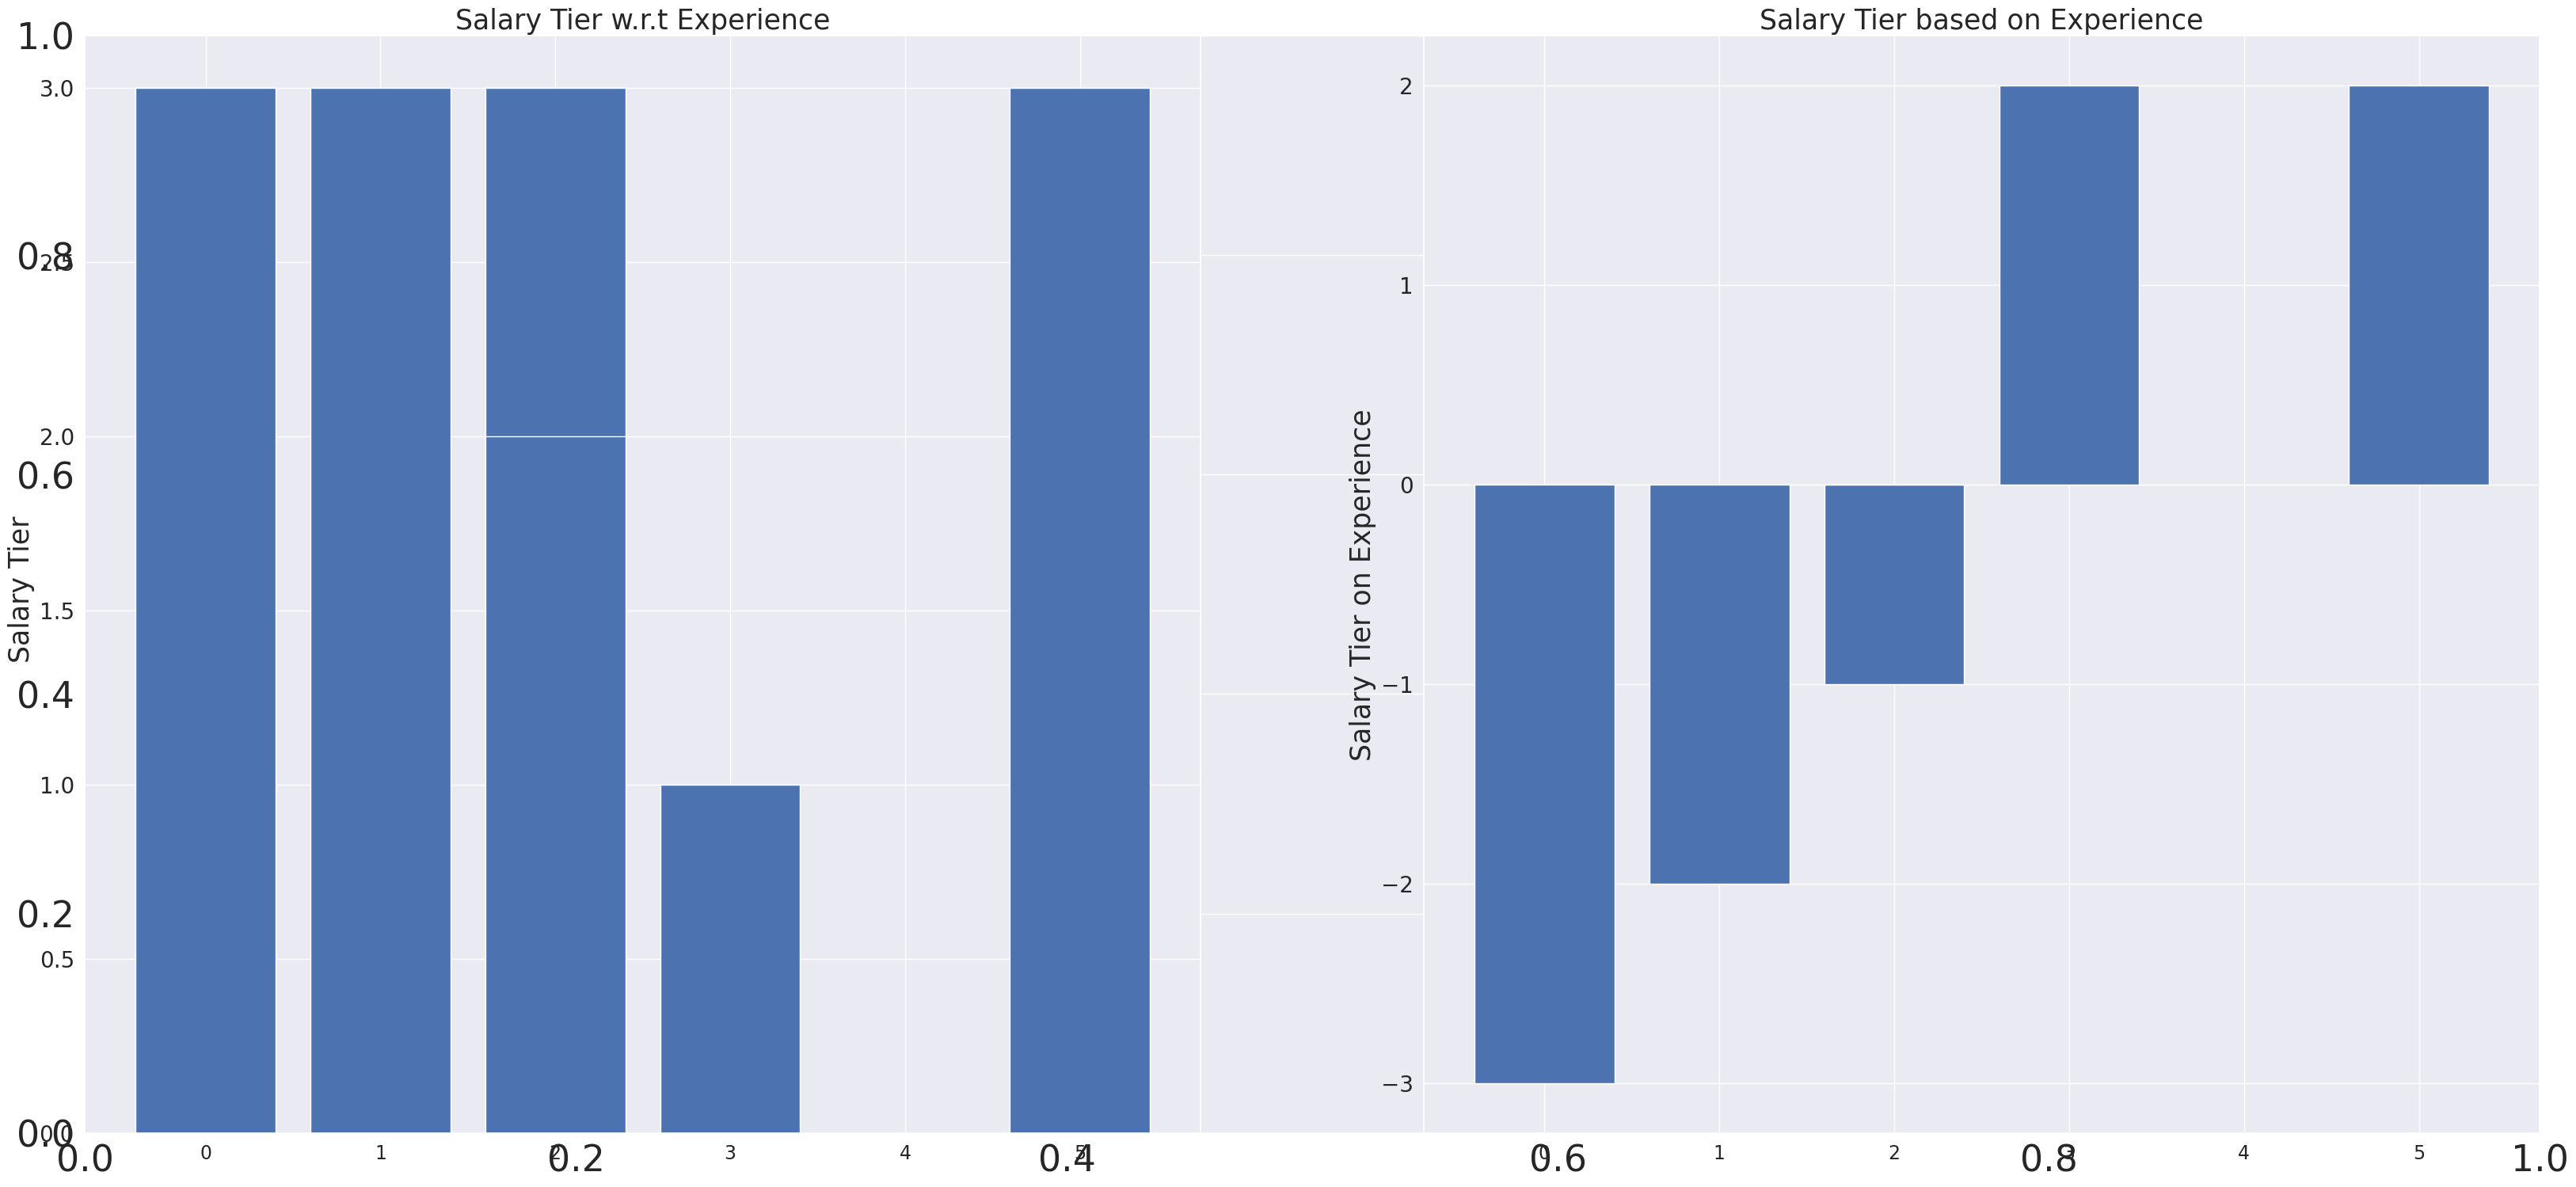

In [139]:
fig, ax = plt.subplots(figsize=(40,18))

x = cd1['ExperienceInCurrentDomain'][0:10]
y = cd1['PaymentTier'][0:10]
y1 = cd1['salaryONexperience'][0:10]

plt.subplot(1,2,1)
plt.bar(x,y)
plt.xticks(fontsize=17)
plt.ylabel('Salary Tier ', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Salary Tier w.r.t Experience', fontsize=25)

plt.subplot(1,2,2)
plt.bar(x,y1)
plt.xticks(fontsize=17)
plt.ylabel('Salary Tier on Experience', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Salary Tier based on Experience', fontsize=25)
plt.show()

# **Importing another Csv File :**

In [140]:
covid_data = pd.read_csv('Covid_data.csv', encoding='latin1')
covid_data.head()

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious,Total_Cases.1,Deaths,Total_Tests
0,USA,"5,02,876","33,752","18,747","2,035","27,314","4,56,815","10,917","1,519",57.0,"25,38,888"
1,Spain,"1,58,273","5,051","16,081",634,"55,668","86,524","7,371","3,385",344.0,"3,55,000"
2,Italy,"1,47,577","3,951","18,849",570,"30,455","98,273","3,497","2,441",312.0,"9,06,864"
3,France,"1,24,869","7,120","13,197",987,"24,932","86,740","7,004","1,913",202.0,"3,33,807"
4,Germany,"1,22,171","3,936","2,736",129,"53,913","65,522","4,895","1,458",33.0,"13,17,887"


# **Plotting a bar chart using Seaborn :**
A bar chart is used to compare categorical data.

In Seaborn, we use sns.barplot() to create it.

# **Code Logic :-**
This code creates a bar chart using Seaborn to show the number of deaths in different countries based on given covid dataset.

/tmp/ipython-input-3996238323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Text(0, 0.5, 'Deaths in Month')

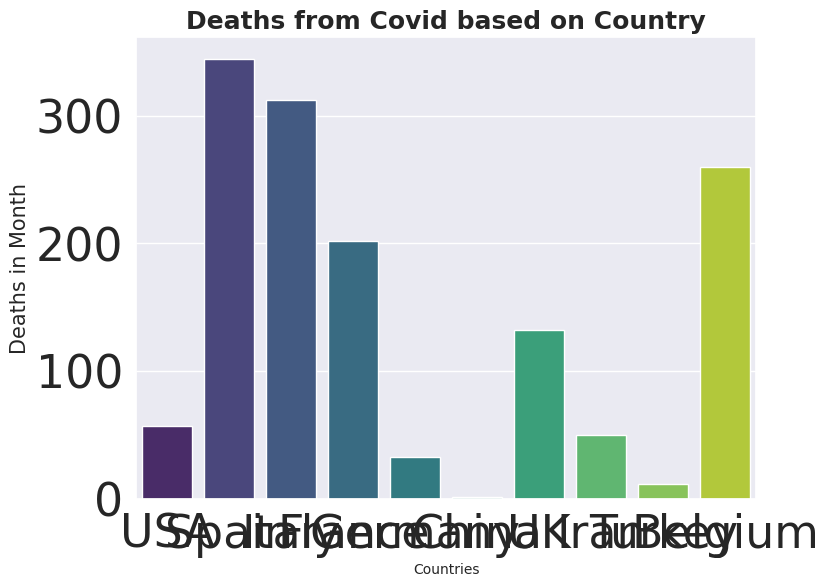

In [141]:
plt.figure(figsize= (8,6))
data = covid_data.head(10)
sns.barplot(data= data, x= 'Country',y = 'Deaths', palette='viridis', legend=False)
plt.title('Deaths from Covid based on Country', fontsize=18, fontweight='bold')
plt.xlabel('Countries', fontsize=10)
plt.ylabel('Deaths in Month', fontsize=15)

# **Sub Bar Plot Using Seaborn :**
A subplot in Matplotlib is a way to place multiple plots (charts) in a single figure. Instead of creating separate figures subplots let us organize plots in rows and columns within the same window.

In Seaborn, you we use sns.barplot() to create it.

But in subploting we aslo give them names to both "left" and "right" charts for creating subplot just like below i use (ax1) for left one chart and(ax2) for the right one chart.

# **Code Logic :-**
This code creates two Seaborn bar charts side by side in one figure for the first 10 rows of fd1:

Left chart (ax1) shows Deaths from covid .

Right chart (ax2) shows people recovered from covid.


Inshort, this allows easy comparison of people died vs people recovered from covid in a month in different countries during covid.

/tmp/ipython-input-2025198187.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipython-input-2025198187.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



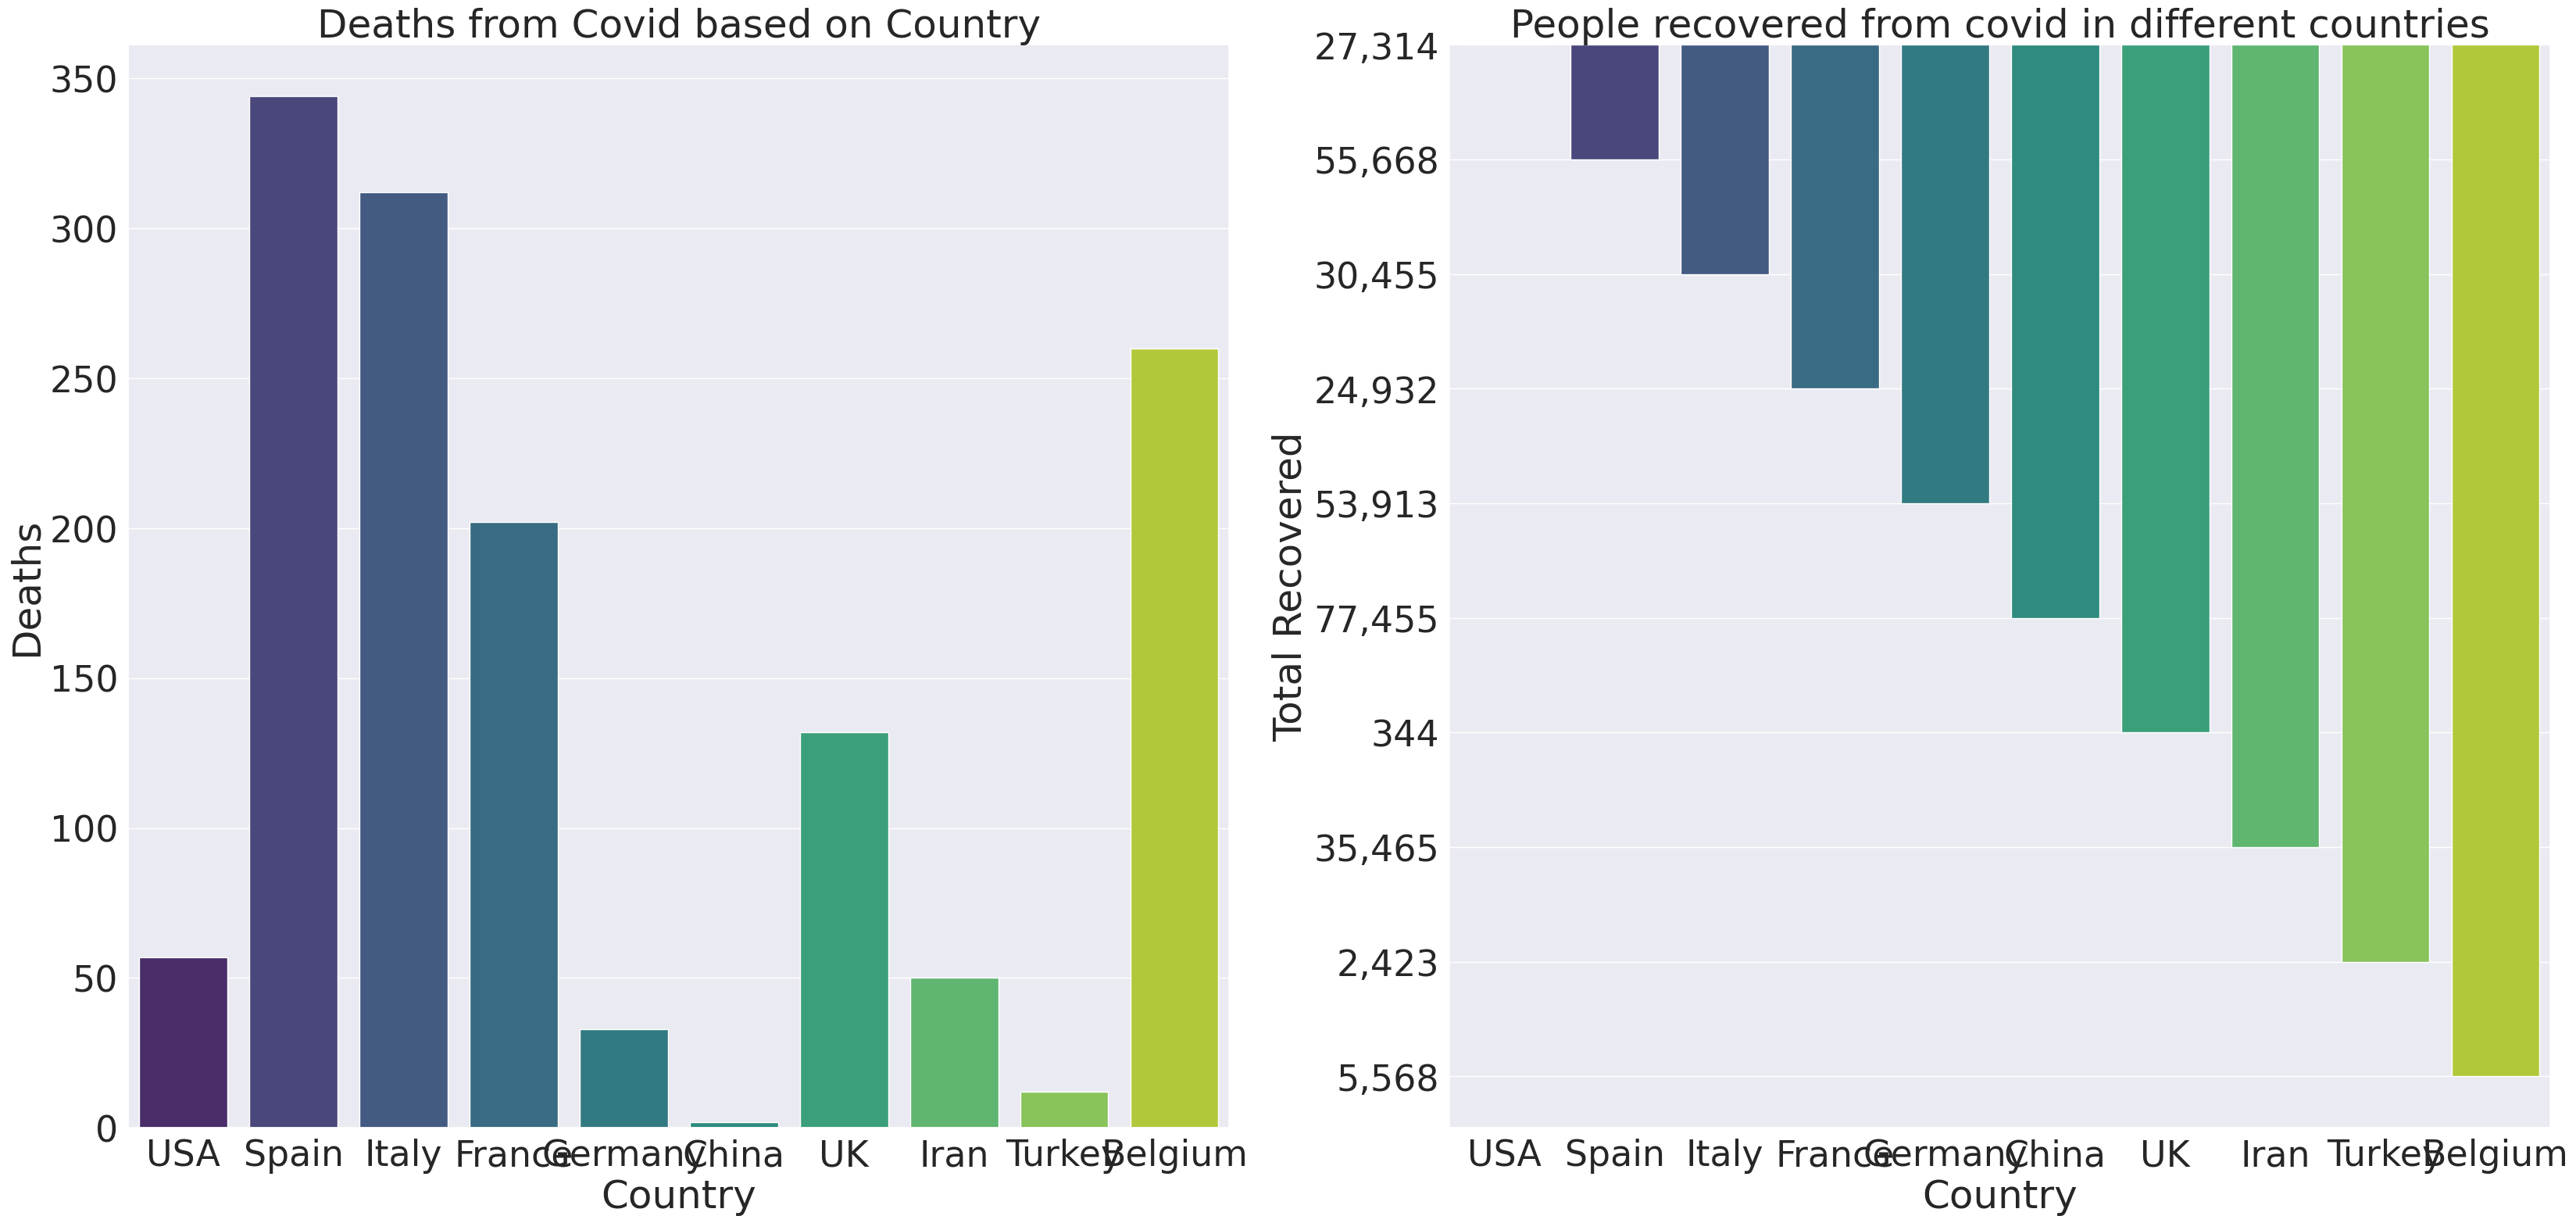

In [142]:
fig, ax = plt.subplots(1, 2,figsize=(40,18))

data = covid_data[0:10]

sns.set(font_scale = 3)
ax1 = sns.barplot(data= data, x= 'Country',y = 'Deaths',palette='viridis', ax = ax[0])
ax1.set_xlabel('Country')
ax1.set_ylabel('Deaths')
ax1.set_title('Deaths from Covid based on Country')


ax2 = sns.barplot(data= data, x= 'Country',y = 'Total_Recovered',palette='viridis', ax=ax[1])
ax2.set_xlabel('Country')
ax2.set_ylabel('Total Recovered')
ax2.set_title('People recovered from covid in different countries')

plt.show()

# **GG** Plot :
In Python, plotnine is a library that brings ggplot-like syntax to Python.

GGplot is a popular data visualization system originally from R, based on the “Grammar of Graphics”. It provides a structured way to create complex and elegant plots by combining layers of data, aesthetics, and geometric objects.

# Key **points**:

Data – the dataset you want to plot.

Aesthetics (aes) – defines what goes on the axes, color, size, etc.

Geoms (geom_) – the type of plot, like geom_bar() for bar charts or geom_line() for line charts.

Facets – for creating subplots based on a variable.

Themes & labels – customize titles, axes, and overall appearance.

# **Plotting a bar chart using GGPLOT :**
I created a bar chart using GGplot that is given below :

# **Code Logic :-**
This code creates a bar chart using Python’s ggplot-style (plotnine) for the top 10 teams in fd1, showing their positions.

It sets the x-axis to the team names in order and the y-axis with breaks from 0 to 300.

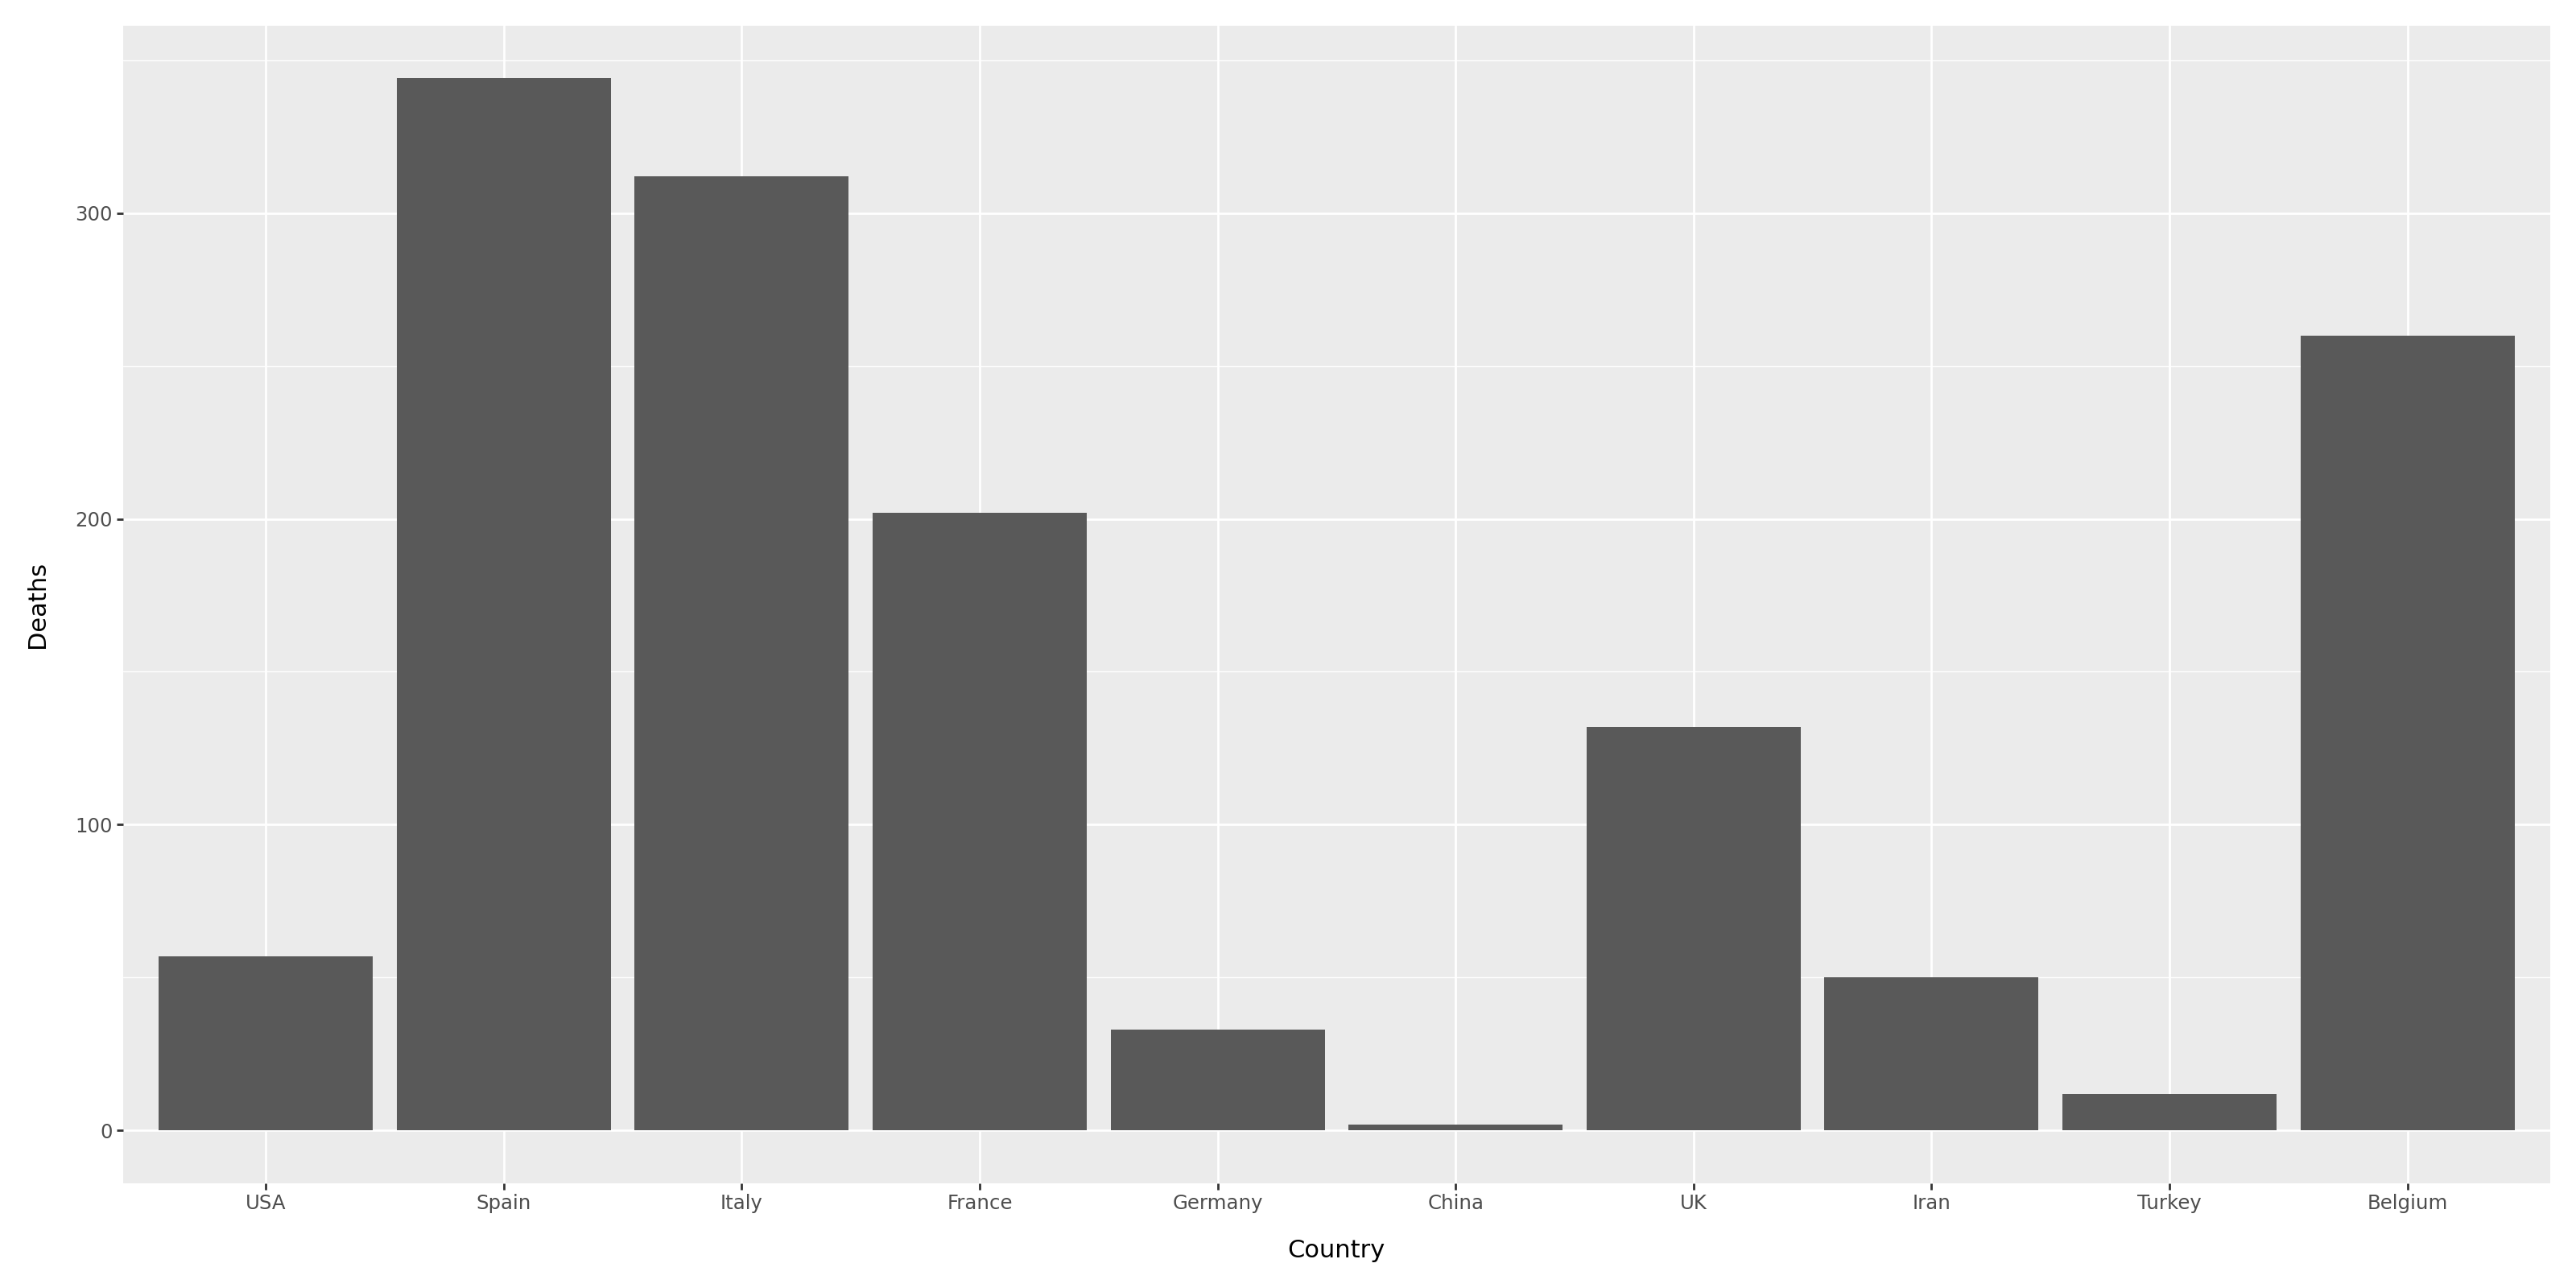

In [143]:
chart_data = covid_data[0:10]

ggplot(chart_data,aes(x='Country',y = 'Deaths')) + geom_bar(stat = 'identity') \
+ scale_x_discrete(limits=chart_data['Country'].tolist()) + theme(figure_size=(16, 8))

# Adding other details to make the chart more informative


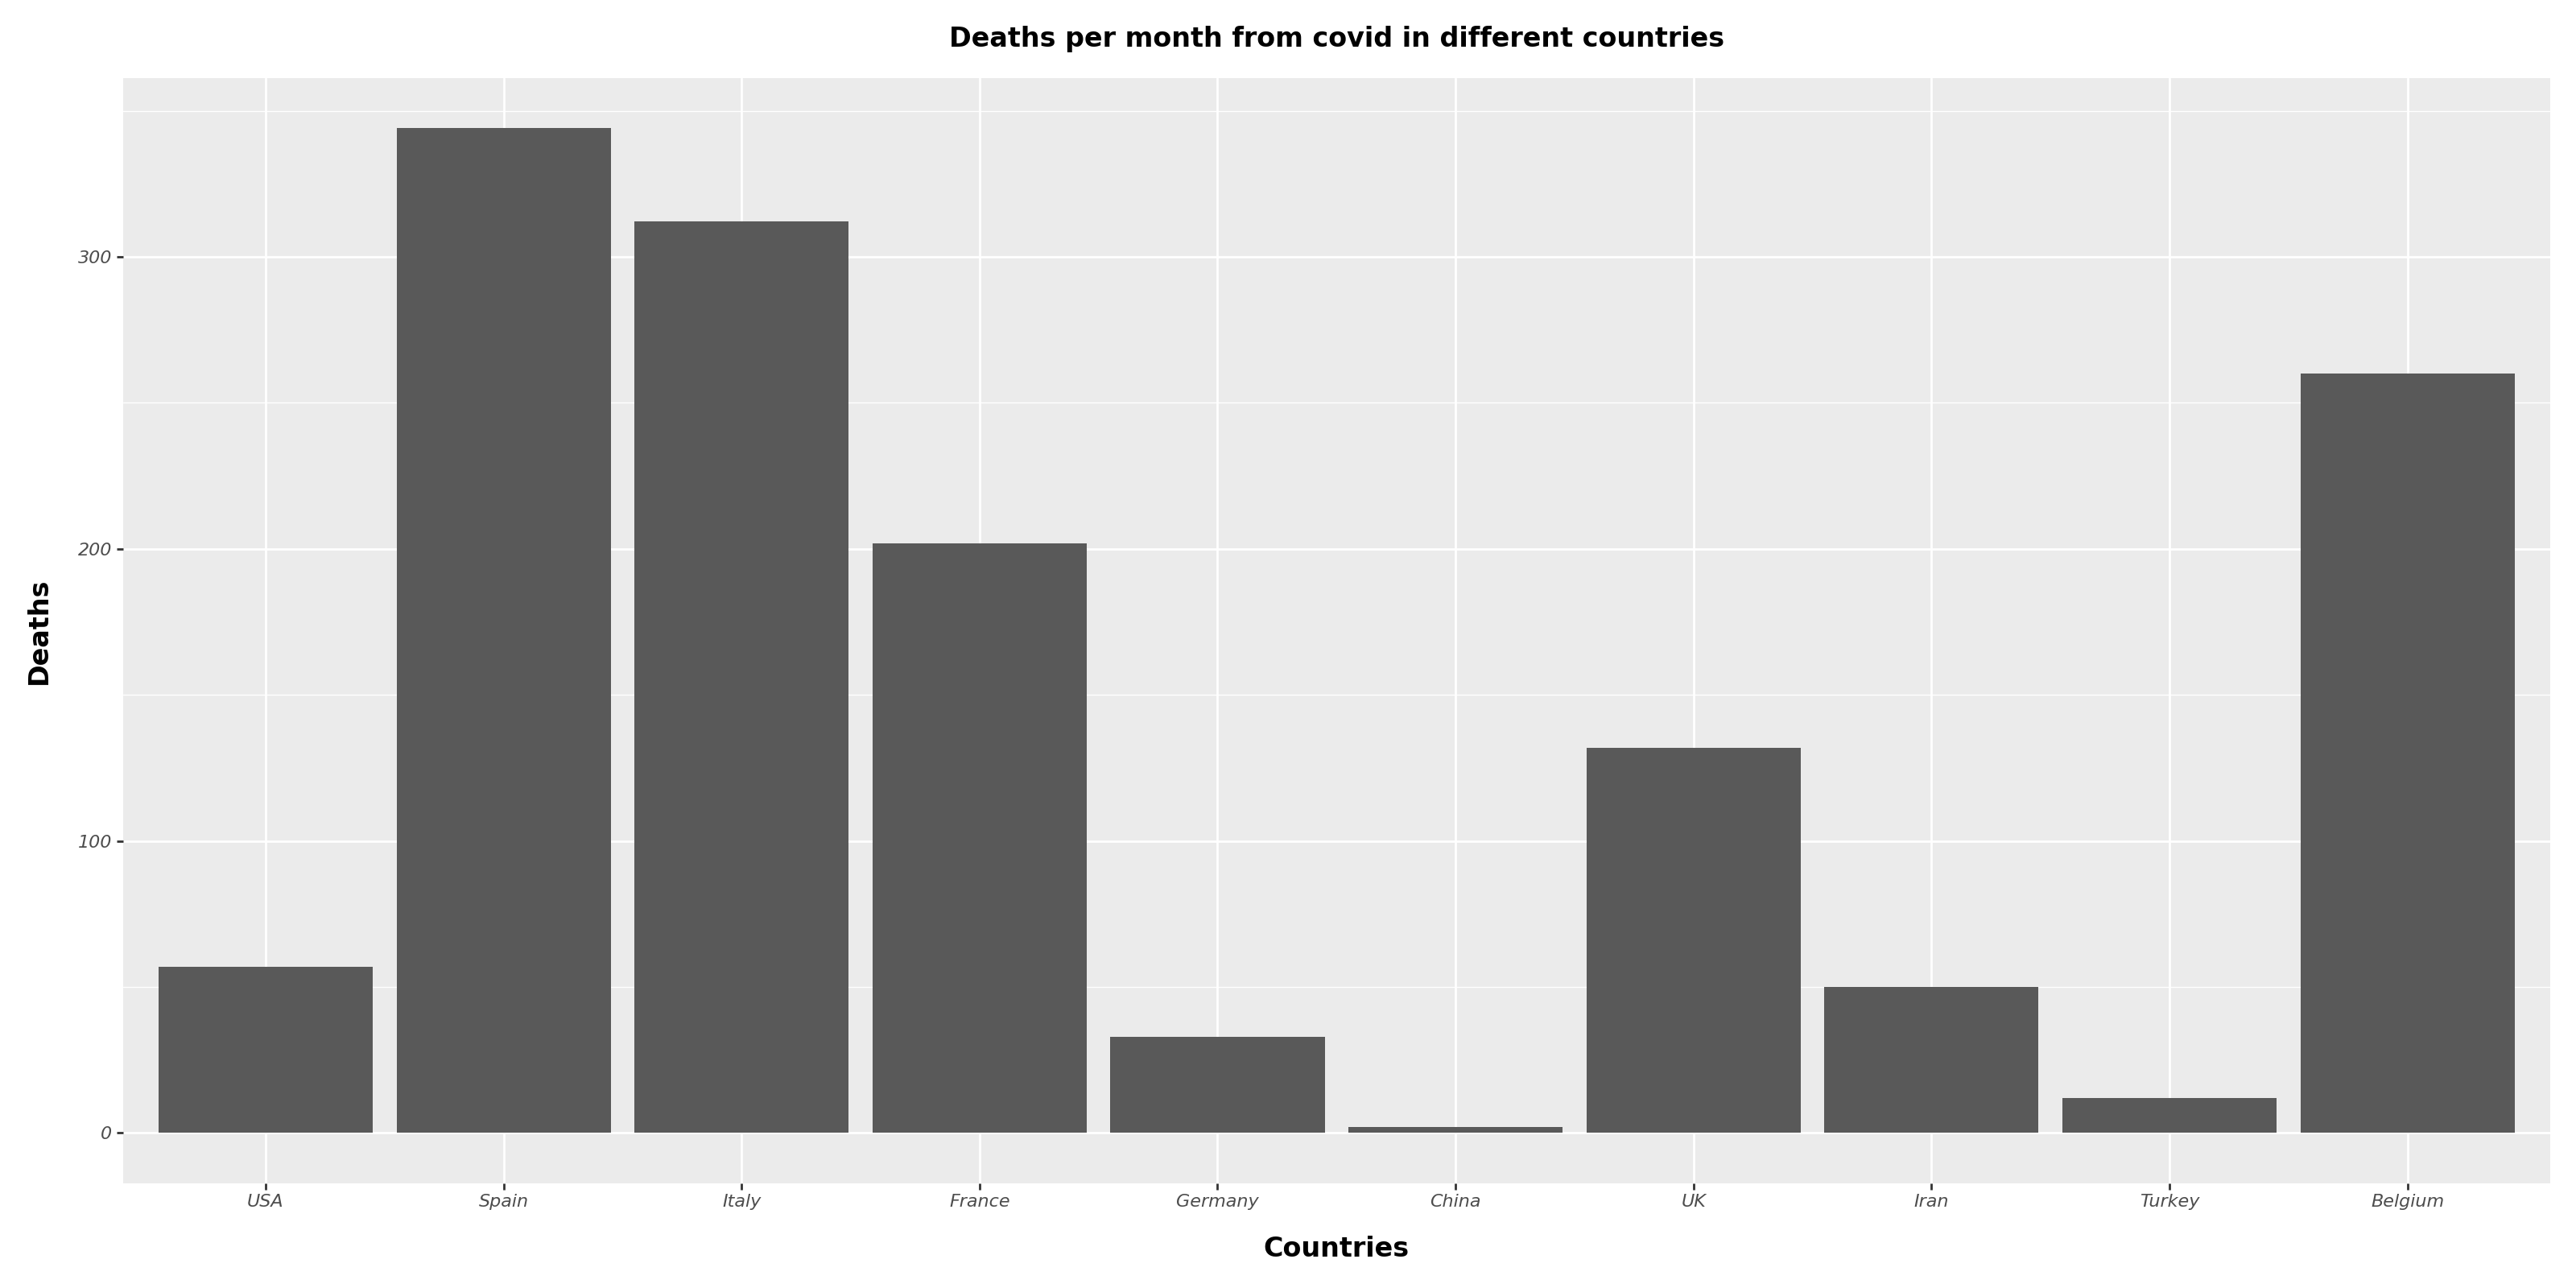

In [144]:
ggplot(chart_data,aes(x='Country',y = 'Deaths')) + geom_bar(stat = 'identity') \
+ scale_x_discrete(limits=chart_data['Country'].tolist()) \
+ labs(y='Deaths', x='Countries', title='Deaths per month from covid in different countries') \
+ theme(figure_size=(16, 8),
        axis_title=element_text(face='bold',size =12),
          axis_text=element_text(face='italic',size =8),
          plot_title=element_text(face='bold',
                                  size=12))

# **Bokeh**

Bokeh is a powerful Python library used to create interactive and visually appealing plots for web browsers. One of the common visualizations is the horizontal bar chart, which is useful for comparing values (like deaths, revenue, or population) across categories (like countries, products, or years).
# **Plotting a bar chart using Bokeh**

The code creates a horizontal bar chart to visualize the number of COVID-19 deaths in the top 10 countries using Bokeh.

In [145]:
data = covid_data[0:10]

fig = figure(y_range = data['Country'], width = 700, height = 500)
fig.hbar(y= data['Country'], right = data['Deaths'], height = 0.9)
show(fig)

# **Adding other details to make the chart more informative**

In [146]:
fig = figure(x_range = data['Country'], width = 700, height = 500,
             title = 'Deaths per month from covid in different countries', x_axis_label = 'Country',
             y_axis_label = 'Deaths')

fig.vbar(x= data['Country'], top = data['Deaths'], width = 0.9)


fig.xaxis.axis_label_text_font_size = "15pt"
fig.xaxis.major_label_text_font_size = "10pt"
fig.yaxis.axis_label_text_font_size = "15pt"
fig.yaxis.major_label_text_font_size = "10pt"
fig.title.text_font_size = '15pt'


show(fig)

# **Sub Bar Plot Using  Bokeh :**

In [147]:
p1 = figure(x_range = data['Country'], width = 480, height = 400,
             title = 'Deaths per month from covid in different countries', x_axis_label = 'Country',
             y_axis_label = 'Deaths')

p1.vbar(x= data['Country'], top = data['Deaths'], width = 0.9)

p2 = figure(x_range = data['Country'], width = 480, height = 400,
             title = 'Recovered per month from covid in different countries', x_axis_label = 'Country',
             y_axis_label = 'Total_Recovered')

p2.vbar(x= data['Country'], top = data['Total_Recovered'], width = 0.9)


gp = bk_plot.gridplot(children=[[p1, p2]])
bk_plot.show(gp)